## I. Image transformer network

In [ ]:
import torch
from torch import nn

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 1. Create Residual_block

In [ ]:
class Residual_block(nn.Module):
  """Residual block
  Architecture: https://arxiv.org/pdf/1610.02915.pdf
  """
  def __init__(self, channel):
    super(Residual_block, self).__init__()
    self.conv_1 = nn.Conv2d(in_channels=channel, out_channels=channel,
                            padding='same', kernel_size=3, stride=1)
    self.inst1 = nn.InstanceNorm2d(channel, affine=True)
    self.conv_2 = nn.Conv2d(in_channels=channel, out_channels=channel,
                            padding='same', kernel_size=3, stride=1)
    self.inst2 = nn.InstanceNorm2d(channel, affine=True)
    self.relu = nn.ReLU()

  def forward(self, x):
    residual = x
    out = self.relu(self.inst1(self.conv_1(x)))
    out = self.inst2(self.conv_2(out))
    return self.relu(out + residual)

In [ ]:
sample = torch.randn((1,128,256,256))
reblock = Residual_block(128)
result = reblock(sample)
result.shape

torch.Size([1, 128, 256, 256])

### 2. Create TransformerNet

In [ ]:
class TransformerNet(nn.Module):
  def __init__(self):
    super(TransformerNet, self).__init__()
    # Downsampling
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=1, padding = 9//2) 
    self.BN_1 = nn.InstanceNorm2d(num_features=32, affine=True)
    self.down_1 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding = 1)
    self.BN_2 = nn.InstanceNorm2d(num_features=64, affine=True)
    self.down_2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding = 1)
    self.BN_3 = nn.InstanceNorm2d(num_features=128, affine=True)
    # Residual connect
    self.res_1 = Residual_block(128)
    self.res_2 = Residual_block(128)
    self.res_3 = Residual_block(128)
    self.res_4 = Residual_block(128)
    self.res_5 = Residual_block(128)
    # Upsampling
    self.up_1 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding= 1)
    self.BN_4 = nn.InstanceNorm2d(num_features=64, affine=True)
    self.up_2 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding = 1, output_padding= 1)
    self.BN_5 = nn.InstanceNorm2d(num_features=32, affine=True)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=3, kernel_size=9, stride=1, padding = 9//2)   

    self.relu = nn.ReLU()

    

  def forward(self, x):
    y = self.relu(self.BN_1(self.conv1(x)))
    # print(y.shape)
    y = self.relu(self.BN_2(self.down_1(y)))
    # print(y.shape)
    y = self.relu(self.BN_3(self.down_2(y)))
    # print(y.shape)

    # print()
    y = self.res_1(y)
    # print(y.shape)
    y = self.res_2(y)
    # print(y.shape)
    y = self.res_3(y)
    # print(y.shape)
    y = self.res_4(y)
    # print(y.shape)
    y = self.res_5(y)
    # print(y.shape)

    # print()
    y = self.relu(self.BN_4(self.up_1(y)))
    # print(y.shape)
    y = self.relu(self.BN_5(self.up_2(y)))
    # print(y.shape)
    y = self.conv2(y)
    # print(y.shape)
    return y


In [ ]:
sample = torch.randn((1, 3, 256, 256))
transformer = TransformerNet()
result =transformer(sample)
result.shape

torch.Size([1, 3, 256, 256])

### 3. Write to file .py

In [ ]:
# Create a directory going modular scripts
import os
os.makedirs('going_modular')

In [ ]:
%%writefile going_modular/transformer_net_2.py
"""
Image transformation networks
"""
import torch
from torch import nn

class Residual_block(nn.Module):
  """Residual block
  Architecture: https://arxiv.org/pdf/1610.02915.pdf
  """
  def __init__(self, channel):
    super(Residual_block, self).__init__()
    self.batchnorm = nn.BatchNorm2d(channel)
    self.conv2d = nn.Conv2d(in_channels=channel, out_channels=channel,
                            padding='same', kernel_size=3, stride=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    residual = x
    out = self.relu(self.batchnorm(self.conv2d(self.batchnorm(x))))
    out = self.batchnorm(self.conv2d(out))
    return out + residual

class TransformerNet(nn.Module):
  def __init__(self):
    super(TransformerNet, self).__init__()
    # Downsampling
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=9, stride=1, padding = 9//2) 
    self.BN_1 = torch.nn.BatchNorm2d(num_features=32)
    self.down_1 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2, padding = 1)
    self.BN_2 = torch.nn.BatchNorm2d(num_features=64)
    self.down_2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding = 1)
    self.BN_3 = torch.nn.BatchNorm2d(num_features=128)
    # Residual connect
    self.res_1 = Residual_block(128)
    self.res_2 = Residual_block(128)
    self.res_3 = Residual_block(128)
    self.res_4 = Residual_block(128)
    self.res_5 = Residual_block(128)
    # Upsampling
    self.up_1 = nn.ConvTranspose2d(in_channels=128, out_channels=64, kernel_size=3, stride=2, padding=1, output_padding= 1)
    self.BN_4 = torch.nn.BatchNorm2d(num_features=64)
    self.up_2 = nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=2, padding = 1, output_padding= 1)
    self.BN_5 = torch.nn.BatchNorm2d(num_features=32)
    # self.up_3 = nn.ConvTranspose2d(in_channels=32, out_channels=3, kernel_size=9, stride=1, padding = 9//2)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=3, kernel_size=9, stride=1, padding = 9//2)
    self.BN_6 = torch.nn.BatchNorm2d(num_features=3)

    self.relu = nn.ReLU()
    self.tanh = nn.Tanh()
    

  def forward(self, x):
    y = self.relu(self.BN_1(self.conv1(x)))
    # print(y.shape)
    y = self.relu(self.BN_2(self.down_1(y)))
    # print(y.shape)
    y = self.relu(self.BN_3(self.down_2(y)))
    # print(y.shape)

    # print()
    y = self.res_1(y)
    # print(y.shape)
    y = self.res_2(y)
    # print(y.shape)
    y = self.res_3(y)
    # print(y.shape)
    y = self.res_4(y)
    # print(y.shape)
    y = self.res_5(y)
    # print(y.shape)

    # print()
    y = self.relu(self.BN_4(self.up_1(y)))
    # print(y.shape)
    y = self.relu(self.BN_5(self.up_2(y)))
    # print(y.shape)
    y = self.tanh(self.BN_6(self.conv2(y)))
    # print(y.shape)
    return y

Writing going_modular/transformer_net_2.py


## II. Create VGG16 pretrain

In [ ]:
!pip install -q torchinfo
from torchinfo import summary

In [ ]:
import torch
from torch import nn
from torchvision.models import vgg16, VGG16_Weights
from collections import namedtuple

In [ ]:
weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights)
feature = model.features

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 142MB/s]


In [ ]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
import torch


class VGG16(nn.Module):
    def __init__(self, requires_grad=False):
        super(VGG16, self).__init__()

        weights = VGG16_Weights.DEFAULT
        vgg_pretrained_features = vgg16(weights=weights).features
        self.slice1 = nn.Sequential()
        self.slice2 = nn.Sequential()
        self.slice3 = nn.Sequential()
        self.slice4 = nn.Sequential()
        for x in range(4):
            self.slice1.add_module(str(x), vgg_pretrained_features[x])
        for x in range(4, 9):
            self.slice2.add_module(str(x), vgg_pretrained_features[x])
        for x in range(9, 16):
            self.slice3.add_module(str(x), vgg_pretrained_features[x])
        for x in range(16, 23):
            self.slice4.add_module(str(x), vgg_pretrained_features[x])
        if not requires_grad:
            for param in self.parameters():
                param.requires_grad = False

    def forward(self, X):
        h = self.slice1(X)
        h_relu1_2 = h
        h = self.slice2(h)
        h_relu2_2 = h
        h = self.slice3(h)
        h_relu3_3 = h
        h = self.slice4(h)
        h_relu4_3 = h
        vgg_outputs = namedtuple("VggOutputs", ['relu1_2', 'relu2_2', 'relu3_3', 'relu4_3'])
        out = vgg_outputs(h_relu1_2, h_relu2_2, h_relu3_3, h_relu4_3)
        return out

In [ ]:
%%writefile going_modular/vgg.py
import torch
from torchvision.models import vgg16, VGG16_Weights
from torch import nn

class VGG16(nn.Module):
    def __init__(self, requires_grad=False):
        super(VGG16, self).__init__()

        weights = VGG16_Weights.DEFAULT
        vgg_pretrained_features = vgg16(weights=weights).features
        self.slice1 = nn.Sequential()
        self.slice2 = nn.Sequential()
        self.slice3 = nn.Sequential()
        self.slice4 = nn.Sequential()
        for x in range(4):
            self.slice1.add_module(str(x), vgg_pretrained_features[x])
        for x in range(4, 9):
            self.slice2.add_module(str(x), vgg_pretrained_features[x])
        for x in range(9, 16):
            self.slice3.add_module(str(x), vgg_pretrained_features[x])
        for x in range(16, 23):
            self.slice4.add_module(str(x), vgg_pretrained_features[x])
        if not requires_grad:
            for param in self.parameters():
                param.requires_grad = False

    def forward(self, X):
        h = self.slice1(X)
        h_relu1_2 = h
        h = self.slice2(h)
        h_relu2_2 = h
        h = self.slice3(h)
        h_relu3_3 = h
        h = self.slice4(h)
        h_relu4_3 = h
        vgg_outputs = namedtuple("VggOutputs", ['relu1_2', 'relu2_2', 'relu3_3', 'relu4_3'])
        out = vgg_outputs(h_relu1_2, h_relu2_2, h_relu3_3, h_relu4_3)
        return out

Writing going_modular/vgg.py


In [ ]:
model = VGG16()

In [ ]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(32, 3, 256, 256), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
VGG16 (VGG16)                            [32, 3, 256, 256]    [32, 64, 256, 256]   --                   False
├─Sequential (slice1)                    [32, 3, 256, 256]    [32, 64, 256, 256]   --                   False
│    └─Conv2d (0)                        [32, 3, 256, 256]    [32, 64, 256, 256]   (1,792)              False
│    └─ReLU (1)                          [32, 64, 256, 256]   [32, 64, 256, 256]   --                   --
│    └─Conv2d (2)                        [32, 64, 256, 256]   [32, 64, 256, 256]   (36,928)             False
│    └─ReLU (3)                          [32, 64, 256, 256]   [32, 64, 256, 256]   --                   --
├─Sequential (slice2)                    [32, 64, 256, 256]   [32, 128, 128, 128]  --                   False
│    └─MaxPool2d (4)                     [32, 64, 256, 256]   [32, 64, 128, 128]   --                   --
│    └─Conv2d (

In [ ]:
sample = torch.randn((32,3,256,256))
features = model(sample.to(device))
features.relu1_2.shape

torch.Size([32, 64, 256, 256])

In [ ]:
%%writefile going_modular/VGG16.py
"""
VGG16 pretrained
"""
import torch
from torch import nn
from torchvision.models import vgg16, VGG16_Weights
from collections import namedtuplen

class VGG16(nn.Module):
  def __init__(self):
    super(VGG16, self).__init__()

    # Load pretrained model
    weights = VGG16_Weights.DEFAULT
    vgg16_model = vgg16(weights=weights)

    # Get feature
    for param in vgg16_model.features.parameters():
      param.requires_grad=False
    vgg16_features = vgg16_model.features
  
    # slide VGG block
    self.slide1 = vgg16_features[:4]
    self.slide2 = vgg16_features[4:9]
    self.slide3 = vgg16_features[9:16]
    self.slide4 = vgg16_features[16:23]
    
  def forward(self, x):
    out = self.slide1(x)
    relu1_2 = out
    out = self.slide2(out)
    relu2_2 = out
    out = self.slide3(out)
    relu3_3 = out
    out = self.slide4(out)
    relu4_3 = out
    vgg_outputs = namedtuple("VggOutputs", ['relu1_2', 'relu2_2', 'relu3_3', 'relu4_3'])
    return vgg_outputs(relu1_2, relu2_2, relu3_3, relu4_3)

Writing going_modular/VGG16.py


## III. Load data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
%%capture
!wget http://images.cocodataset.org/zips/test2017.zip
!unzip ./test2017.zip -d /content/data/

### 1. Visualize an image

In [ ]:
len(os.listdir('/content/data/test2017'))

40670

In [ ]:
path_data = Path('/content/data')

Random image path:  /content/data/test2017/000000401752.jpg
Image hight:  428
Image width:  640


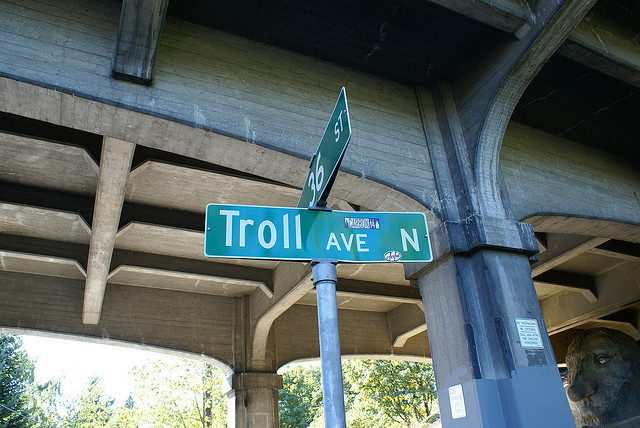

In [ ]:

import random
from PIL import Image

# Set random seed
random.seed(42)

# Get all image paths
image_path_list = list(path_data.glob("*/*"))

# Random image
image_path = random.choice(image_path_list)
image = Image.open(image_path)

print("Random image path: ", image_path)
print("Image hight: ", image.height)
print("Image width: ", image.width)
image

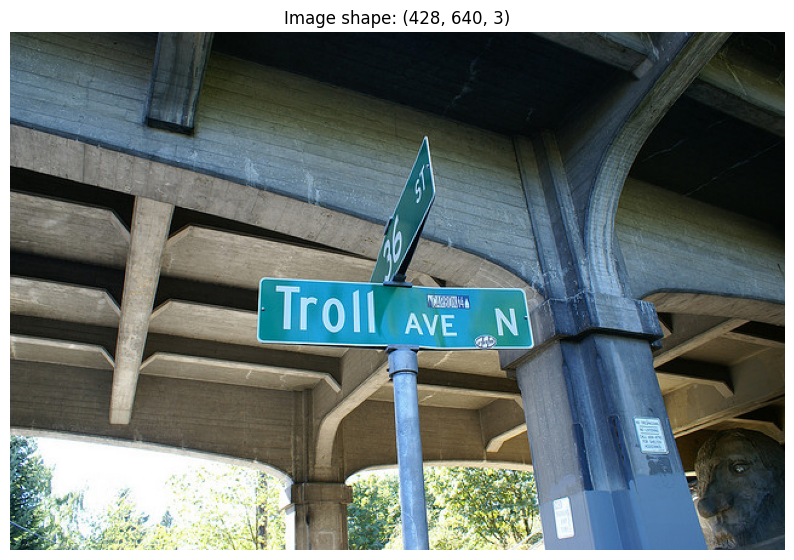

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Show image using matplot lib
img_as_array = np.array(image)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image shape: {img_as_array.shape}")
plt.axis(False);

### 3. Load style image

In [ ]:
path_style = Path('/content/gdrive/MyDrive/Computer_Vision/style_image/vg_la_cafe.jpg')

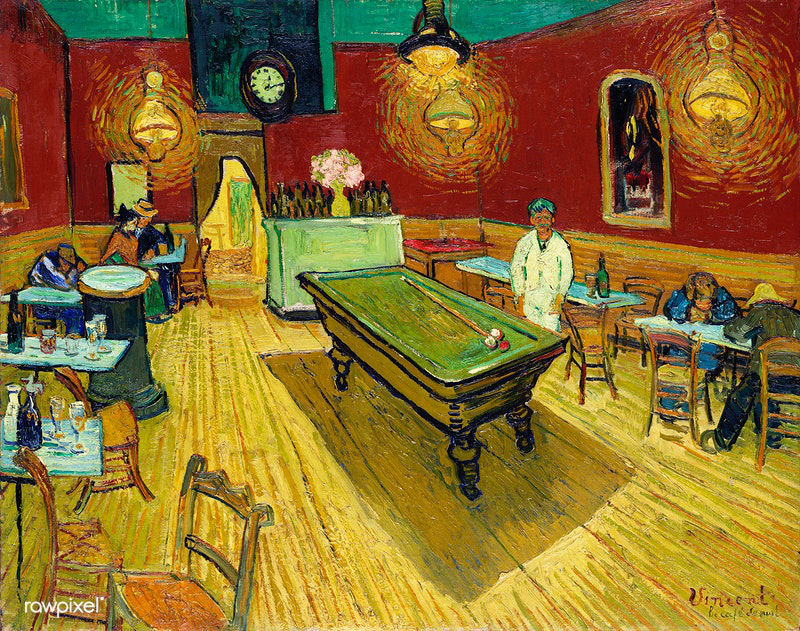

In [ ]:
style_image = Image.open(path_style)
style_image

### 2. Transforming data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
mean = [0.4763, 0.4507, 0.4094]
std = [0.2702, 0.2652, 0.2811]

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)])

style_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])

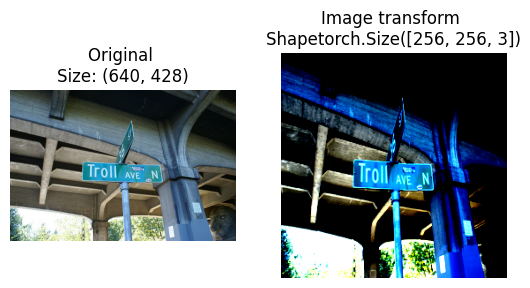

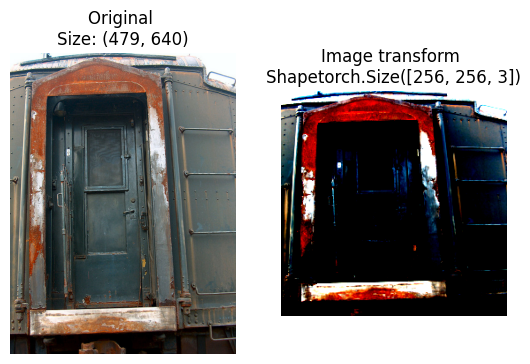

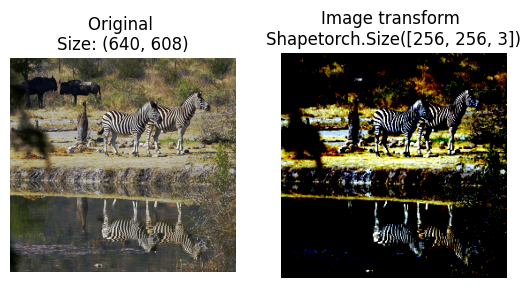

In [ ]:
def plot_transforms_image(image_paths, transform, n=3, seed = 42):
  random.seed(seed)
  random_image_path = random.sample(image_paths, k=n)
  for path in random_image_path:
    with Image.open(path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original \nSize: {f.size}')
      ax[0].axis('off')

      transform_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transform_image)
      ax[1].set_title(f'Image transform \nShape{transform_image.shape}')
      ax[1].axis('off')

plot_transforms_image(image_path_list, data_transform, n=3)

In [ ]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor_image):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:`````````````
            Tensor: Normalized image.
        """
        tensor = tensor_image.detach().clone()
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

In [ ]:
def show_image_UnNormalize(tensor_image, mean, std):
  unorm = UnNormalize(mean=mean, std=std)
  img = unorm(tensor_image)
  img = img.permute(1, 2, 0)
  plt.imshow(img)
  plt.show()

### 4. Load image data using ImageFolder

In [ ]:
from torch.utils.data import DataLoader

# Batch size
BATCH_SIZE = 8
NUM_EPOCHS = 10

torch.manual_seed(42)
train_data = datasets.ImageFolder(root=path_data, transform=data_transform)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE)
style_image_transform = style_transform(style_image)
train_dataloader

In [ ]:
torch.manual_seed(42)
transformerNet = TransformerNet().to(device)

vgg16_model = VGG16().to(device)

## IV. Create train model

### 1. Set optimizer and loss

In [ ]:
optimizer = torch.optim.Adam(transformerNet.parameters(), lr=0.001)
mse_loss = torch.nn.MSELoss()

In [ ]:
def content_loss(gen_feature, img_feature, loss_fn, content_weight):
  loss = content_weight*loss_fn(gen_feature, img_feature)
  return loss

In [ ]:
def gram_matrix(features):
  (b, ch, h, w) = features.size()
  features = features.view(b, ch, h*w)
  features_t = features.transpose(1, 2)
  matrix = features.bmm(features_t) / (ch * h * w)
  return matrix

In [ ]:
def style_loss(gen_features, style_gram_matrix, loss_fn, style_weight, len_batch):
  loss = 0
  for gen_f, style_g in zip(gen_features, style_gram_matrix):
    gen_g = gram_matrix(gen_f)
    loss += loss_fn(gen_g, style_g[:len_batch,:,:])
  return loss*style_weight


In [ ]:
# Get features and gram matrix of style image
batch_style = style_image_transform.repeat(BATCH_SIZE, 1, 1, 1).to(device)
style_features = vgg16_model(batch_style)
style_gram = [gram_matrix(feature) for feature in style_features]

In [ ]:
from torchvision.utils import save_image

### 2. Get sample

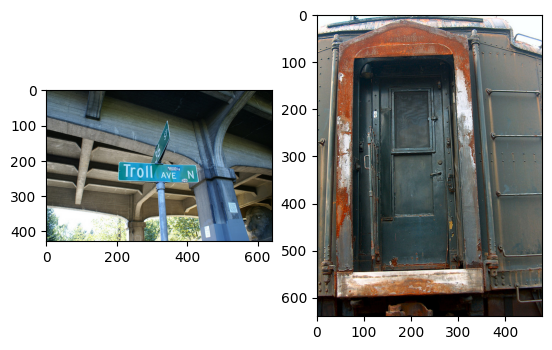

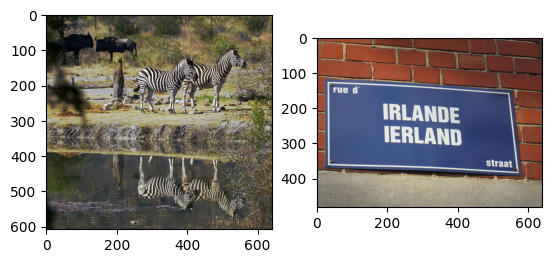

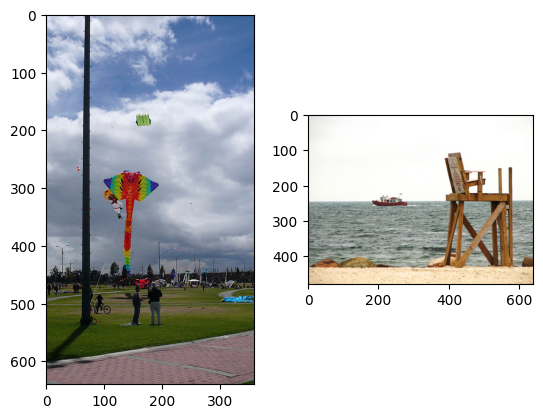

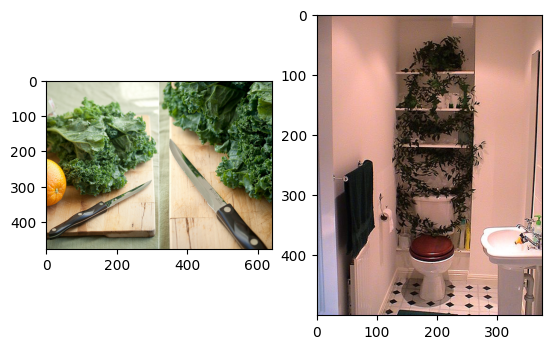

In [ ]:
# Get 8 images sample
image_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)])

random.seed(42)
path_image_sample = random.sample(image_path_list , k=8)


for i in range(0, len(path_image_sample), 2):
  fig, axs = plt.subplots(1,2) 
  axs[0].imshow(np.array(Image.open(path_image_sample[i])))
  axs[1].imshow(np.array(Image.open(path_image_sample[i+1])))

image_sample = []
for path in path_image_sample:
  image = Image.open(path)
  image = image.resize((256, 256))
  image_sample.append(image_transformer(image))

# get list image transform into tensor
image_sample = torch.stack(image_sample)


def save_sample(image_sample, model, path_save):
  """
  save result image in training
  """
  model.eval()
  with torch.inference_mode():
    result_images = model(image_sample.to(device))

    # un normalize
    unnor = UnNormalize(mean=mean, std=std)
    unnor_image = []
    for img, result in zip(image_sample, result_images):
      img = unnor(img)
      result = unnor(result)

      # Concatenating original image and result image
      img = torch.cat((img, result), dim=1)
      unnor_image.append(img)
    
    img = torch.stack(unnor_image, dim=0)
    save_image(img, path_save, nrow=4)

In [ ]:
def load_checkpoint(model, optimizer, checkpoint):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    current_epoch = checkpoint['current_epoch']
    return model, optimizer, current_epoch

### Training

In [ ]:
import time

LOAD_CHECKPOINT = False
path_load_checkpoint = "/content/gdrive/MyDrive/Computer_Vision/candy/Epoch_2_Batch idx_4999.pth.tar"
torch.manual_seed(42)

iter_checkpoint = 1000
path_save_checkpoint = '/content/gdrive/MyDrive/Computer_Vision/saved_models/caffee'

# Get 8 images sample
image_transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)])

random.seed(42)
path_image_sample = random.sample(image_path_list , k=8)

image_sample = []
for path in path_image_sample:
  image = Image.open(path)
  image = image.resize((256, 256))
  image_sample.append(image_transformer(image))

image_sample = torch.stack(image_sample, dim=0)
image_sample = image_sample.to(device)

if LOAD_CHECKPOINT:
    transformerNet, optimizer, current_epoch = load_checkpoint(transformer, optimizer,
                                                                              torch.load(path_load_checkpoint))
    transformerNet.to(device)
else:
    current_epoch = 0
    start_batch_idx = 0

# Train
for epoch in range(current_epoch+1, NUM_EPOCHS):
  counter = 0
  for batch_idx, (x, _) in enumerate(train_dataloader):
    transformerNet.train()
    
    # forward
    x = x.to(device)
    y = transformerNet(x)
    
    x_f = vgg16_model(x)
    y_f = vgg16_model(y)

    # Caculate loss
    # content_l = content_loss(y_f.relu2_2, x_f.relu2_2, mse_loss, 1e5)
    content_l =1e5 * mse_loss(y_f.relu2_2, x_f.relu2_2)


    # style_l = style_loss(y_f, style_gram, mse_loss, 1e10, len(x))
    style_l = 0.
    for ft_y, gm_s in zip(y_f, style_gram):
        gm_y = gram_matrix(ft_y)
        style_l += mse_loss(gm_y, gm_s[:len(x), :, :])
    style_l *= 1e10
    total_loss = content_l + style_l

    # zero grad
    optimizer.zero_grad()

    # backward
    total_loss.backward()

    # optimizer step
    optimizer.step()

    counter += 1

    if (batch_idx + 1) % 100 == 0:
      name_save = f"Epoch: {epoch} | Batch idx: {batch_idx}.jpg"
      path_save_image_sample = os.path.join(path_save_checkpoint, 'test')
      if os.path.exists(path_save_image_sample) == False:
          os.makedirs(path_save_image_sample)
      
      # Save image sample
      save_sample(image_sample=image_sample, model=transformerNet, path_save=os.path.join(path_save_image_sample, name_save))
      mesg = f"{time.ctime()} | Epoch: {epoch}  | batch idx: {batch_idx}/{len(train_dataloader)} | content loss: {content_l.item()}  | style loss: {style_l.item()}  | total loss: {total_loss.item()}"
      print(mesg)

    if (batch_idx + 1) % iter_checkpoint == 0 or batch_idx == len(train_dataloader):
      transformerNet.eval().cpu()
      ckpt_model_filename = f"Epoch_{epoch}_Batch idx_{batch_idx}" + ".pth.tar"
      
      checkpoint = {'state_dict': transformerNet.state_dict(), 'optimizer': optimizer.state_dict(),
                              'current_epoch': epoch, 'start_batch_idx': batch_idx,
                              'content_loss': content_l.item(), 'style_loss': style_l.item(),
                              'total_loss': total_loss.item()}
      print(f"Saving model to {os.path.join(path_save_checkpoint, ckpt_model_filename)}")
      torch.save(checkpoint, os.path.join(path_save_checkpoint, ckpt_model_filename))
      transformerNet.train().to(device)

  print(f"Epoch: {epoch} | average loss: {total_loss/counter}")

Sat Apr  1 03:46:31 2023 | Epoch: 1  | batch idx: 99/5084 | content loss: 731071.875  | style loss: 1698280.125  | total loss: 2429352.0
Sat Apr  1 03:47:09 2023 | Epoch: 1  | batch idx: 199/5084 | content loss: 822300.5  | style loss: 681209.125  | total loss: 1503509.625
Sat Apr  1 03:47:47 2023 | Epoch: 1  | batch idx: 299/5084 | content loss: 769312.0  | style loss: 411885.375  | total loss: 1181197.375
Sat Apr  1 03:48:25 2023 | Epoch: 1  | batch idx: 399/5084 | content loss: 814561.0625  | style loss: 309078.65625  | total loss: 1123639.75
Sat Apr  1 03:49:03 2023 | Epoch: 1  | batch idx: 499/5084 | content loss: 840726.6875  | style loss: 247688.328125  | total loss: 1088415.0
Sat Apr  1 03:49:41 2023 | Epoch: 1  | batch idx: 599/5084 | content loss: 725227.0625  | style loss: 241099.203125  | total loss: 966326.25
Sat Apr  1 03:50:20 2023 | Epoch: 1  | batch idx: 699/5084 | content loss: 709100.8125  | style loss: 224608.03125  | total loss: 933708.875
Sat Apr  1 03:50:57 2023 